## Pull QT db

This notebook pulls data from the Physionet QT database:
https://physionet.org/content/qtdb/1.0.0/

This is a database with two channel ECG data, with markers for P, QRS, T, and U waves. The labels of interest for this project is the QRS complex.

Import stuff and define global variables

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wfdb
import pdb
import pandas as pd

!pip install -q wfdb

pb_dir = 'qtdb/'

Define a function to parse out the QRS labels

In [2]:
def get_QRS_labels(inds, symbols, data, record_name, channel):
    #look for the '(', 'N', ')' sequence which is the annotation for the QRS complex
    QRS_inds = []
    ind = 0
    N = len(symbols)
    while (ind < N - 2):
        if symbols[ind] == '(':
            if symbols[ind + 1] == 'N':
                if symbols[ind + 2] == ')':
                    tmp_inds = [i for i in range(inds[ind], inds[ind + 2] + 1)]
                    QRS_inds.extend(tmp_inds)

        ind = ind + 1

    #check if there aren't any QRS labels, in which case return None
    if len(QRS_inds) == 0:
        print('No QRS labels')
        return None, None

    #clip any data that is outside of the QRS labels
    #and shift the QRS_inds to zero index and
    data = data[QRS_inds[0]:QRS_inds[-1] + 1]
    QRS_inds = np.array(QRS_inds)
    QRS_inds = QRS_inds - QRS_inds[0]

    """
    plt.figure()
    plt.plot(data)
    plt.plot(QRS_inds, data[QRS_inds])
    plt.title('%s %s' % (record_name, channel))
    plt.show()
    """

    return QRS_inds, data


Define the main function, which pulls the data and labels from the database, and defines an associated "inds_to_keep" index. This index corresponds to the regions where there are actually QRS labels, as not all the data is fully labeled.

sel100


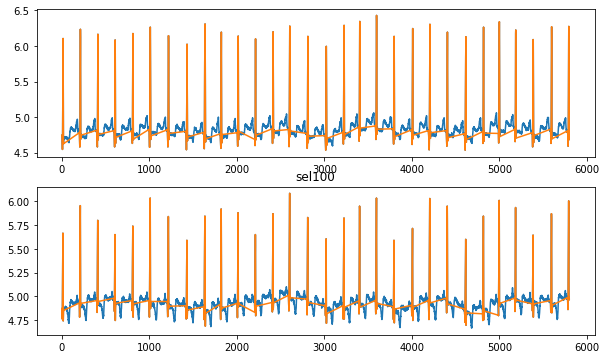

sel102


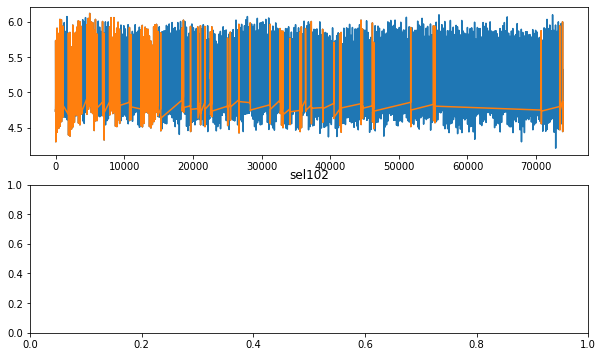

sel103


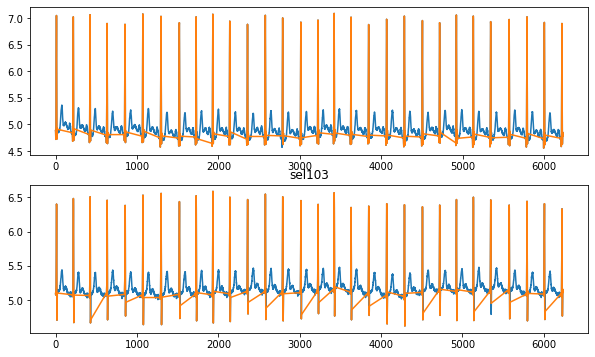

sel104
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel104.q2c


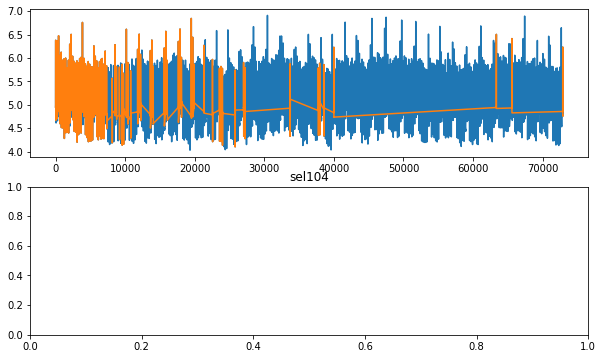

sel114


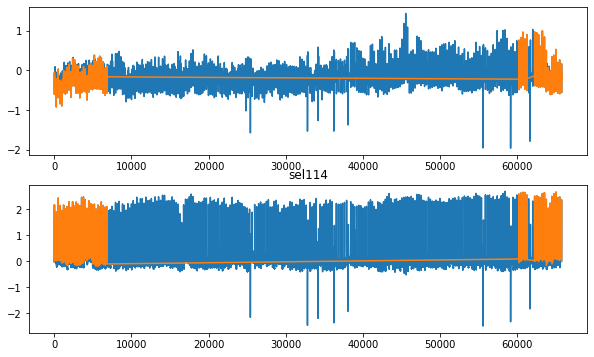

sel116


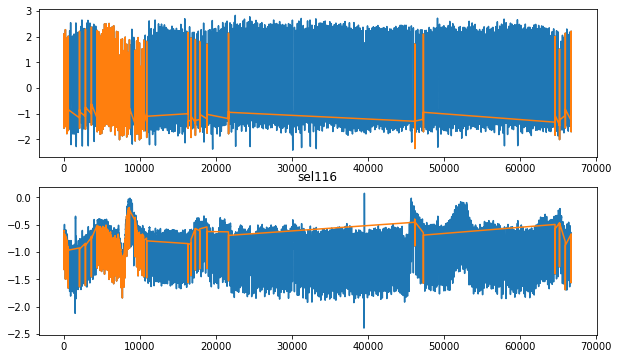

sel117


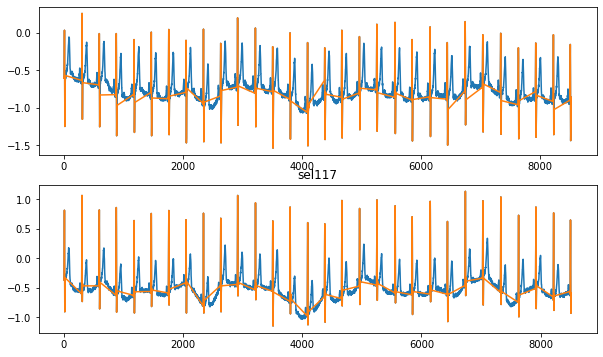

sel123


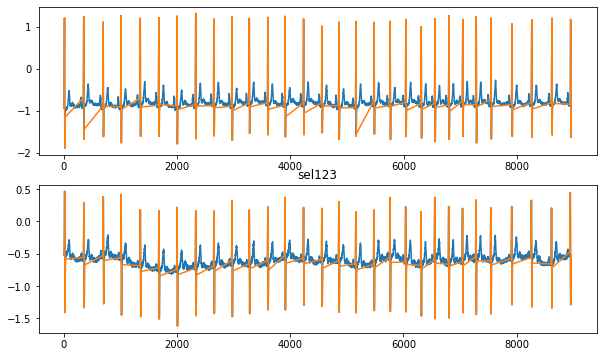

sel14046
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel14046.q2c


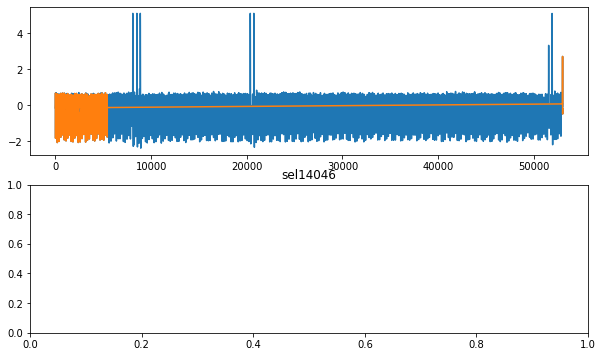

sel14157
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel14157.q2c


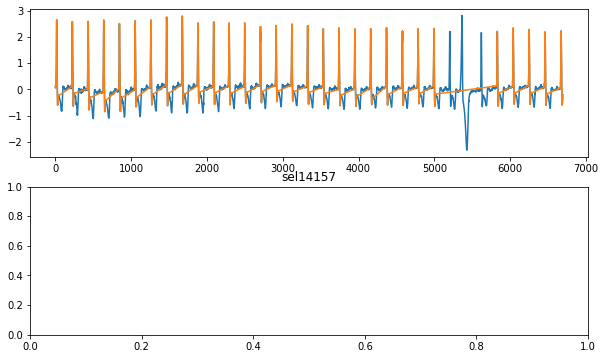

sel14172
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel14172.q2c


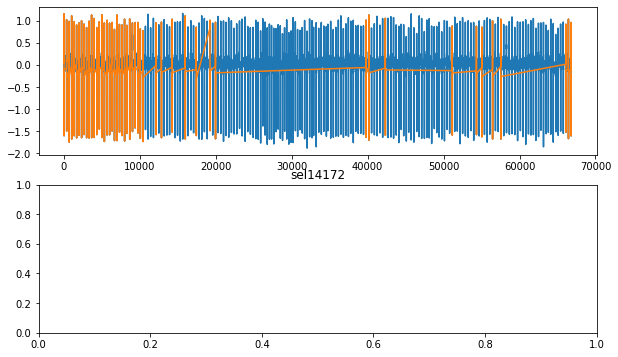

sel15814
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel15814.q2c


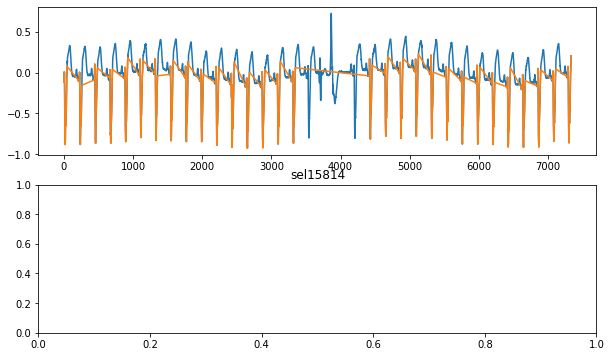

sel16265
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel16265.q2c


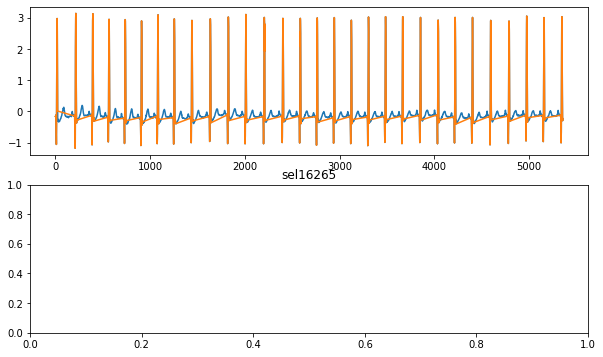

sel16272
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel16272.q2c


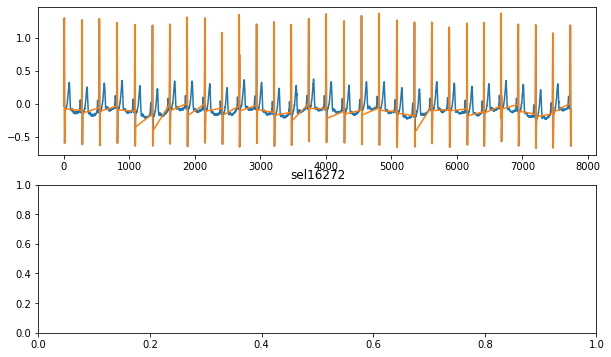

sel16273
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel16273.q2c


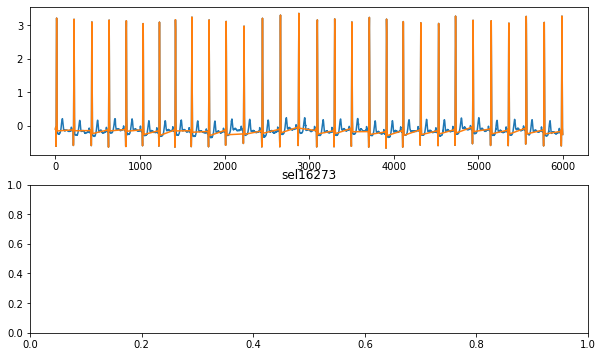

sel16420
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel16420.q2c


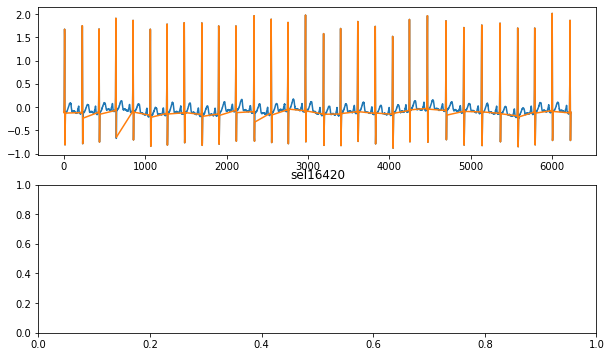

sel16483
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel16483.q2c


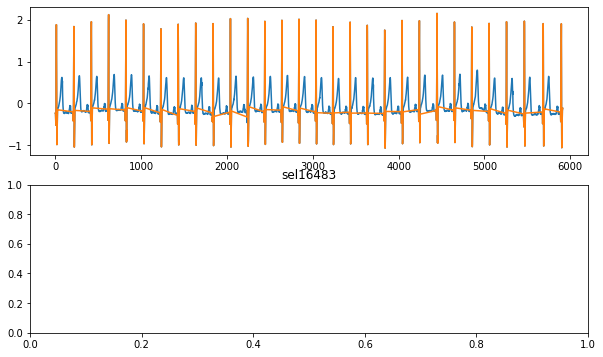

sel16539
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel16539.q2c


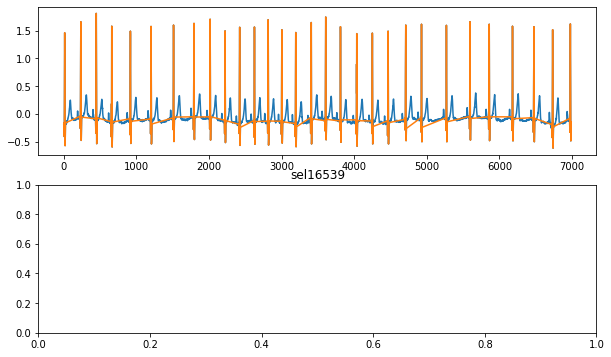

sel16773
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel16773.q2c


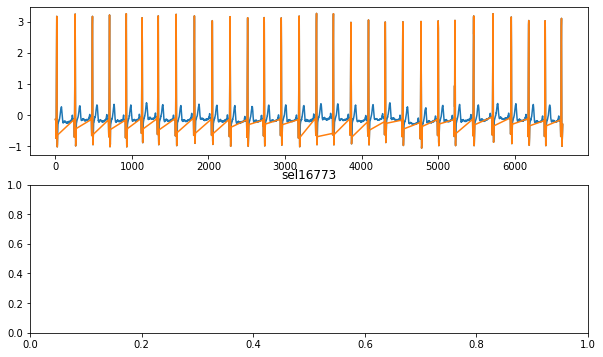

sel16786
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel16786.q2c


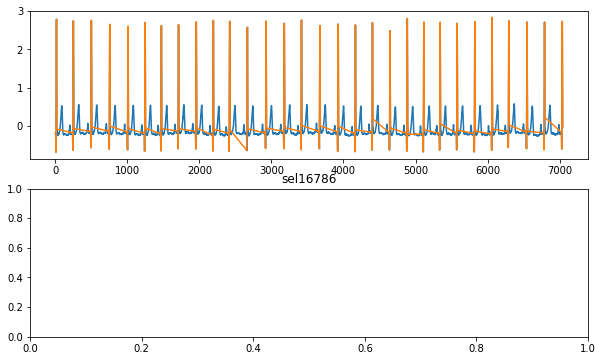

sel16795
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel16795.q2c


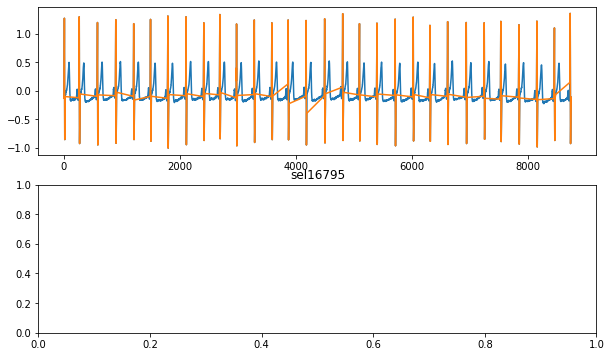

sel17152
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel17152.q2c


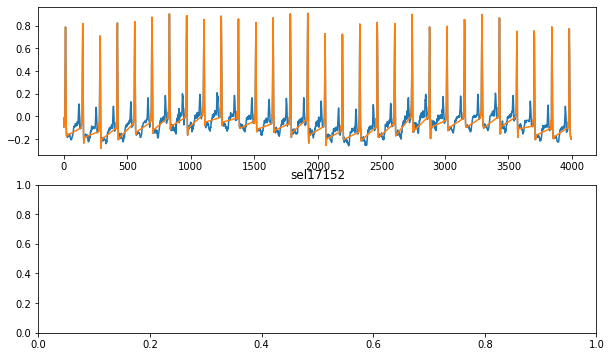

sel17453
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel17453.q2c


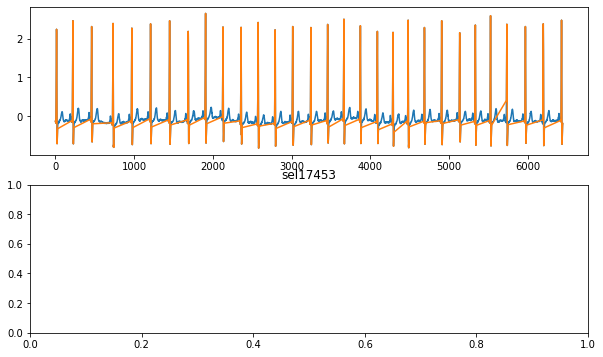

sel213


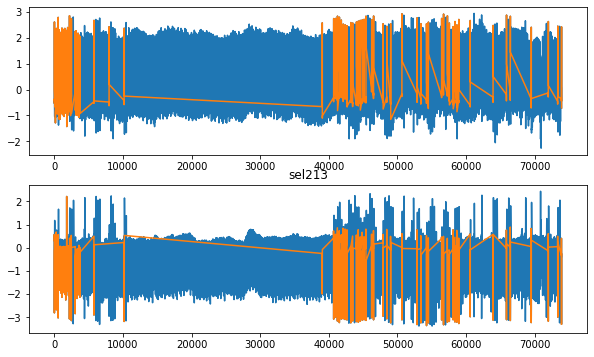

sel221


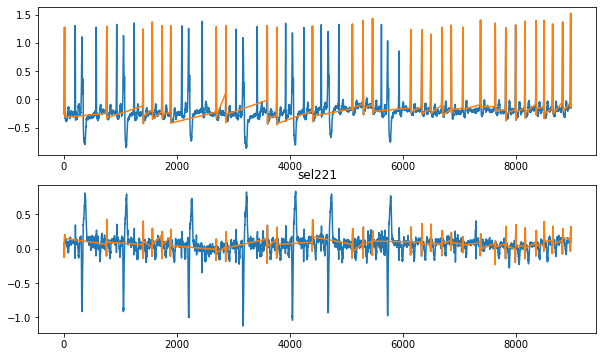

sel223


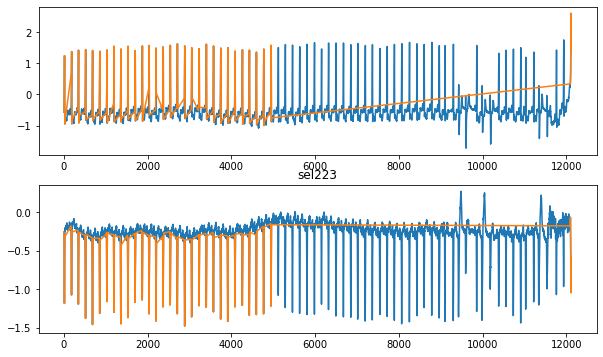

sel230


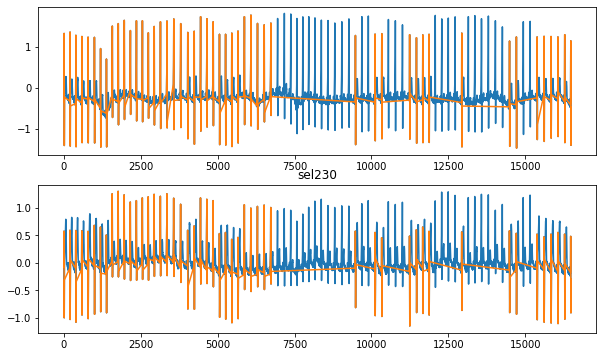

sel231
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel231.q2c


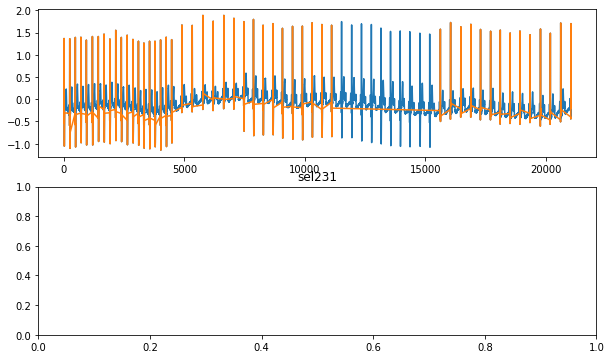

sel232
No QRS labels
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel232.q2c


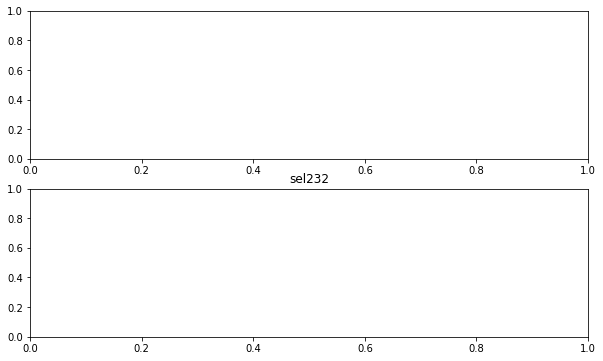

sel233
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel233.q2c


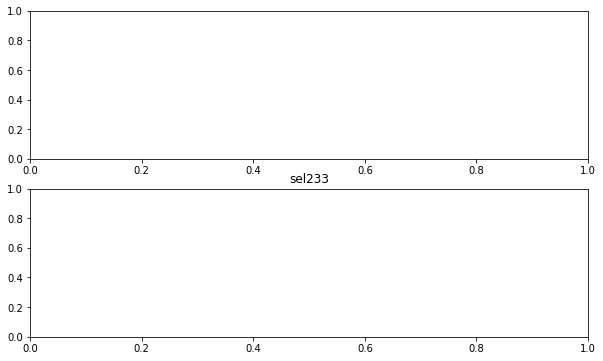

sel30
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel30.q2c


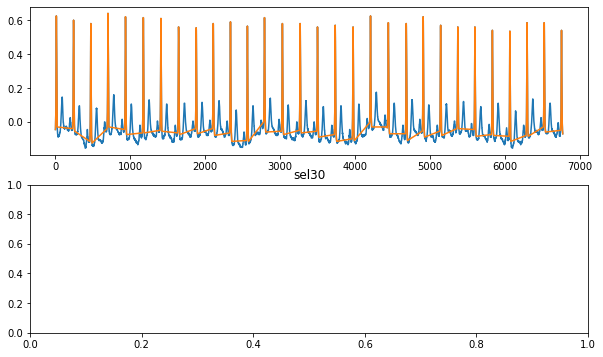

sel301
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel301.q2c


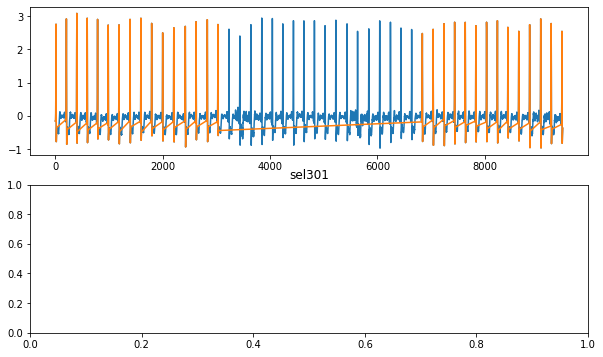

sel302
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel302.q2c


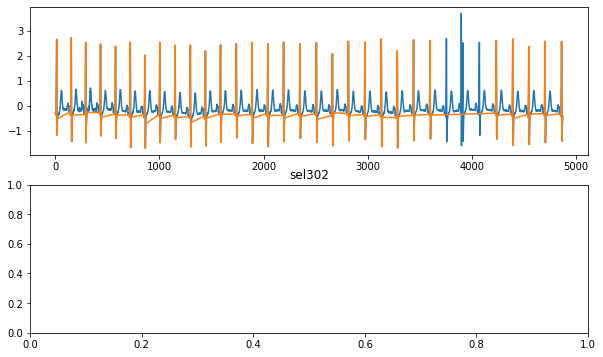

sel306
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel306.q2c


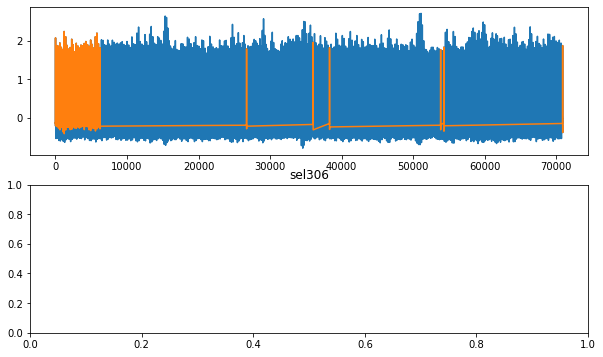

sel307
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel307.q2c


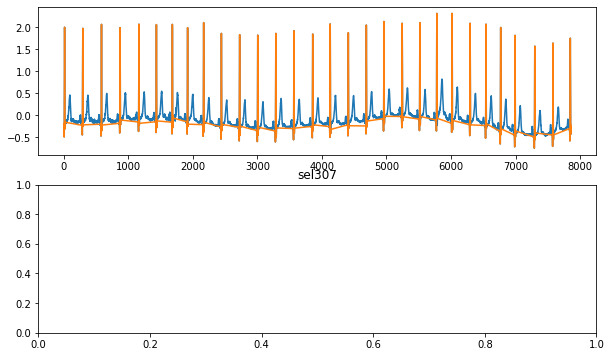

sel308
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel308.q2c


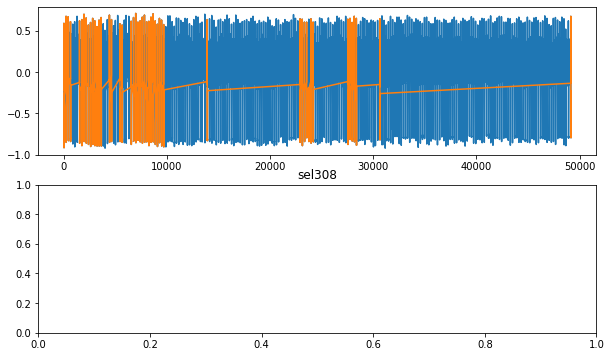

sel31
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel31.q2c


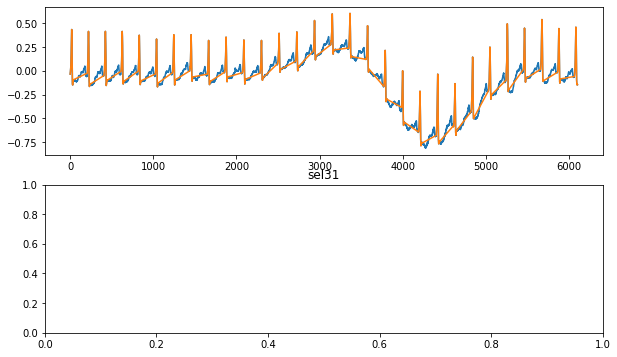

sel310
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel310.q2c


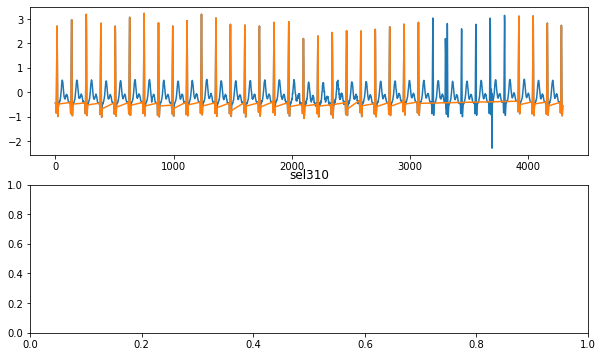

sel32
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel32.q2c


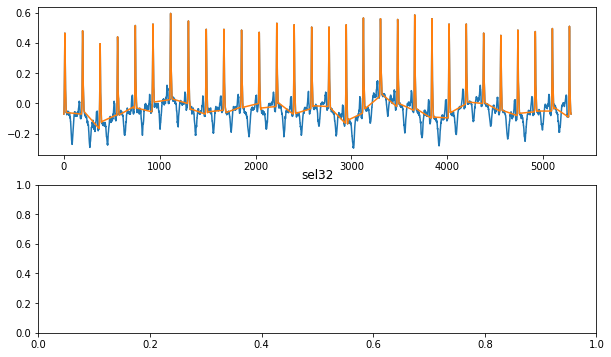

sel33
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel33.q2c


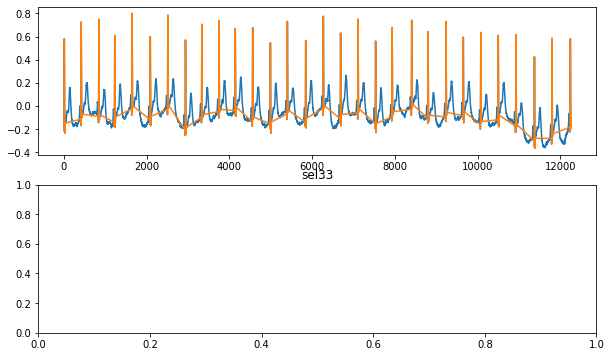

sel34
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel34.q2c


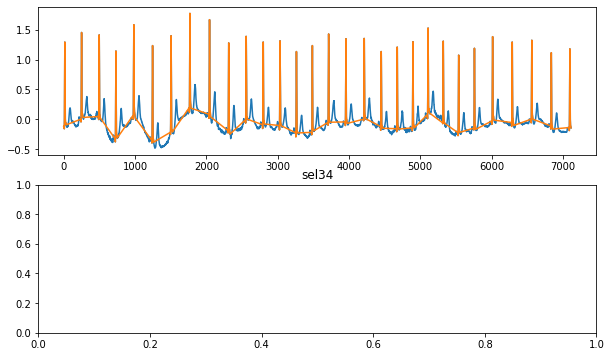

sel35
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel35.q2c


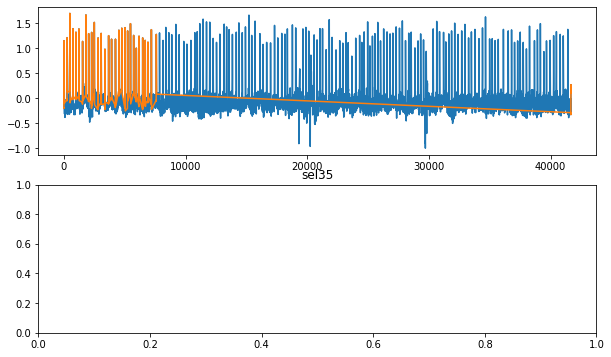

sel36
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel36.q2c


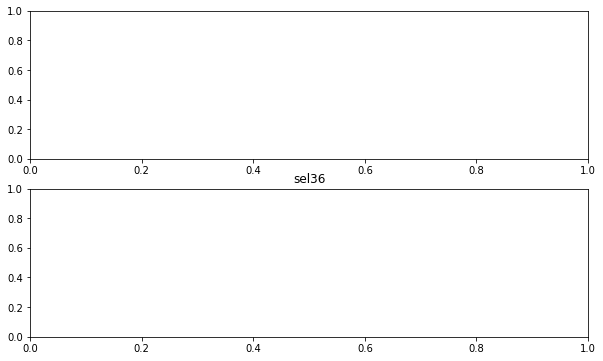

sel37
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel37.q2c


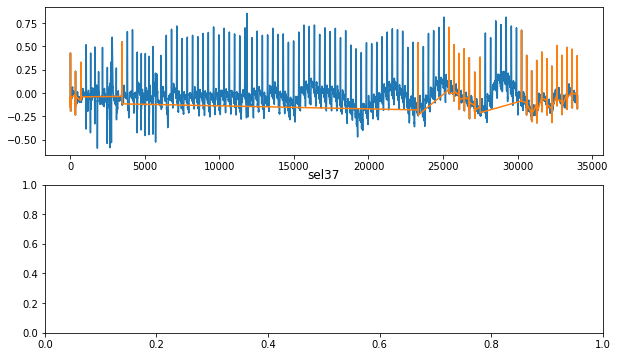

sel38
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel38.q2c


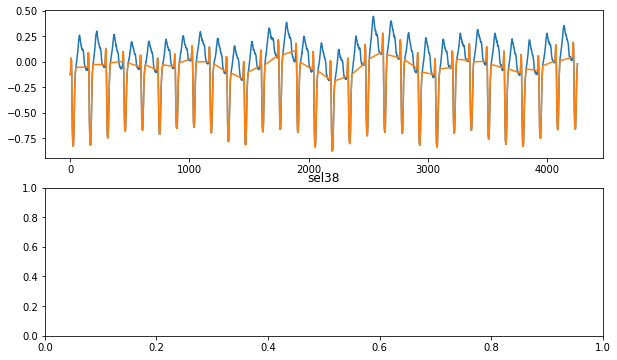

sel39
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel39.q2c


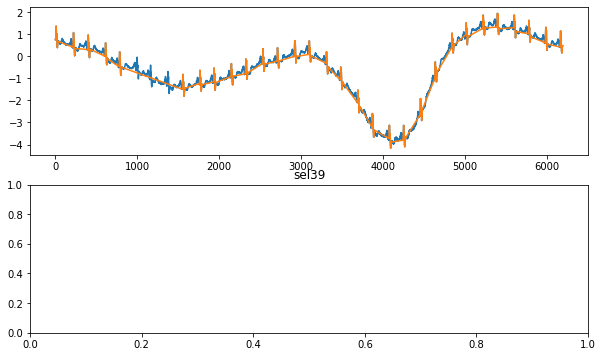

sel40
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel40.q2c


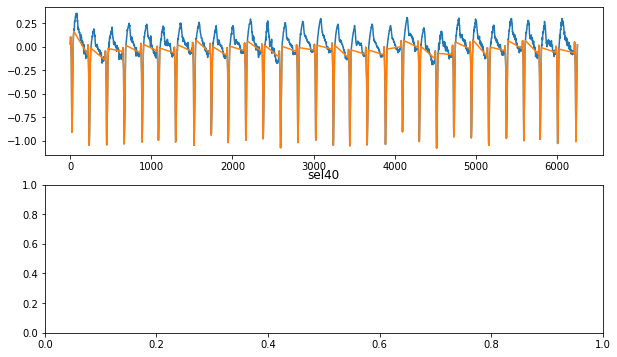

sel41
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel41.q2c


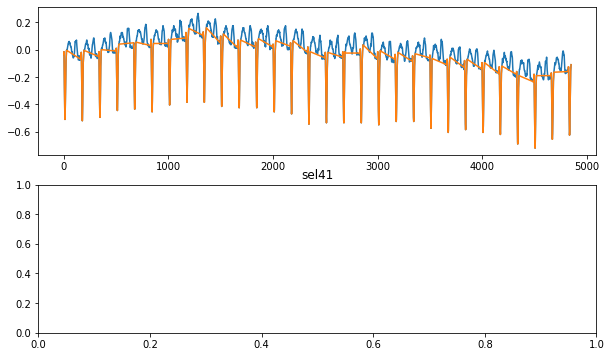

sel42
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel42.q2c


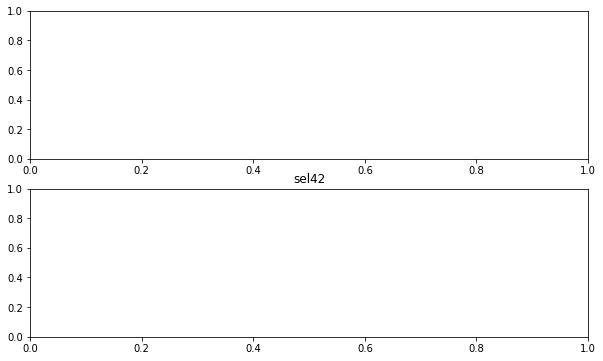

sel43
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel43.q2c


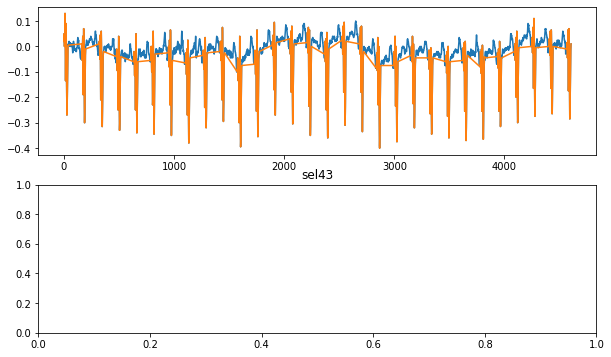

sel44
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel44.q2c


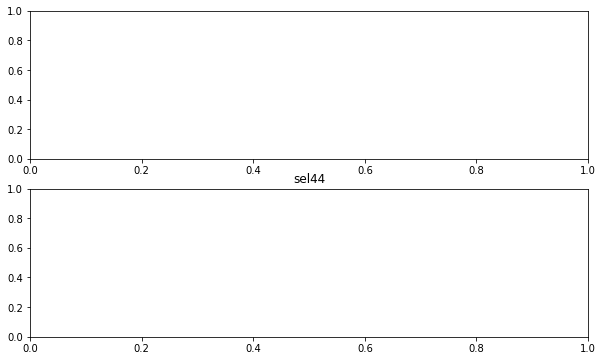

sel45
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel45.q2c


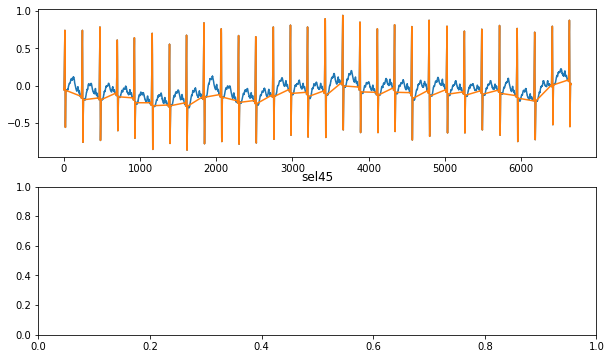

sel46
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel46.q2c


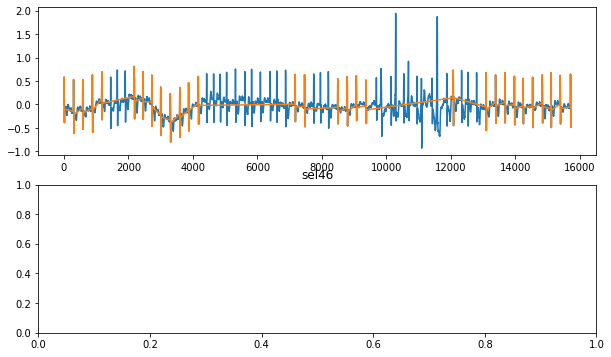

sel47
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel47.q2c


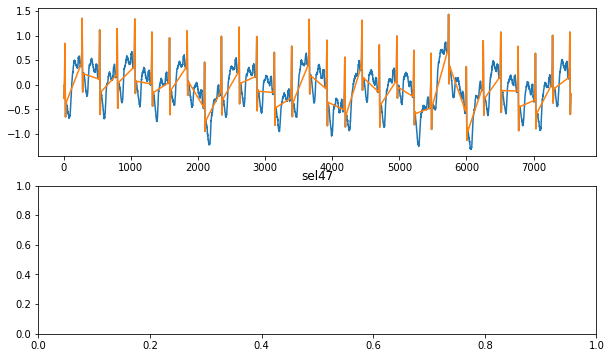

sel48
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel48.q2c


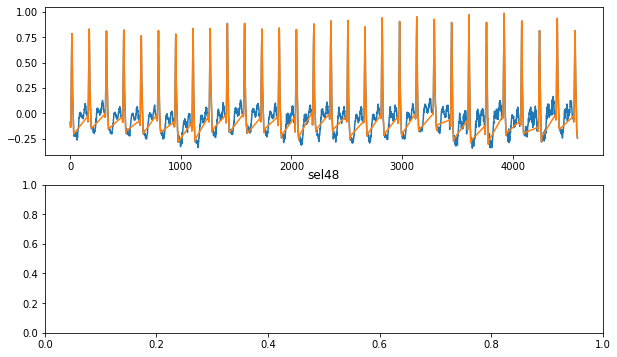

sel49
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel49.q2c


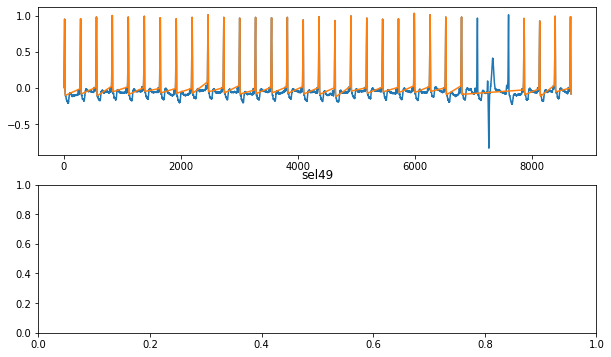

sel50
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel50.q2c


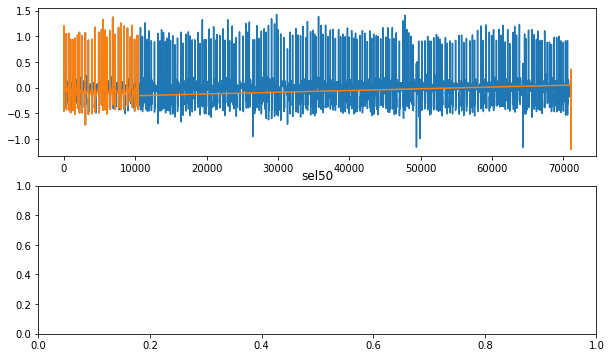

sel51
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel51.q2c


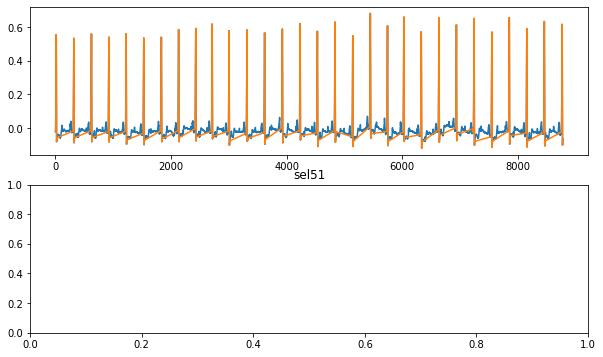

sel52
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel52.q2c


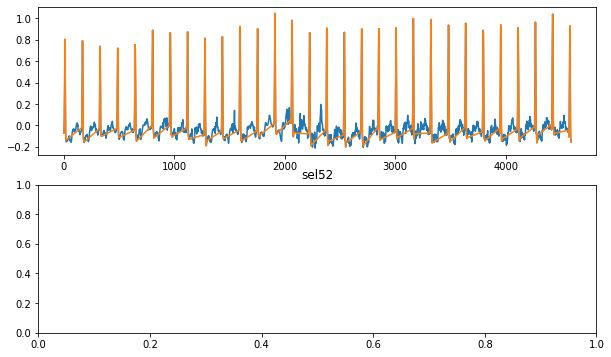

sel803
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel803.q2c


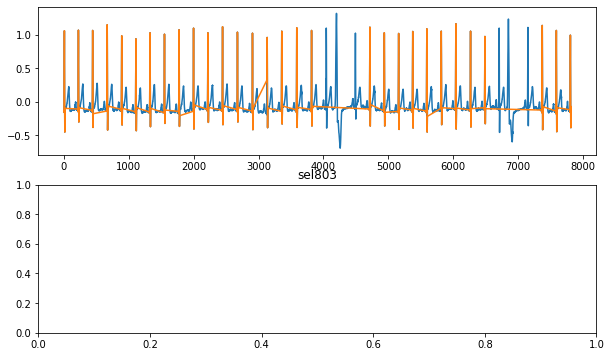

sel808
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel808.q2c


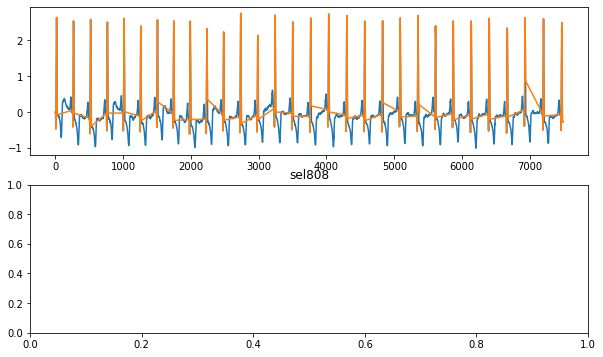

sel811
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel811.q2c


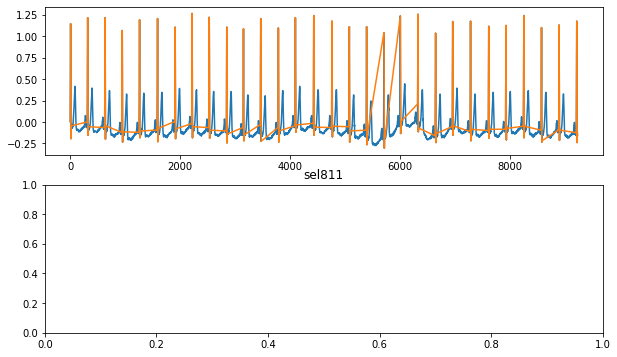

sel820
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel820.q2c


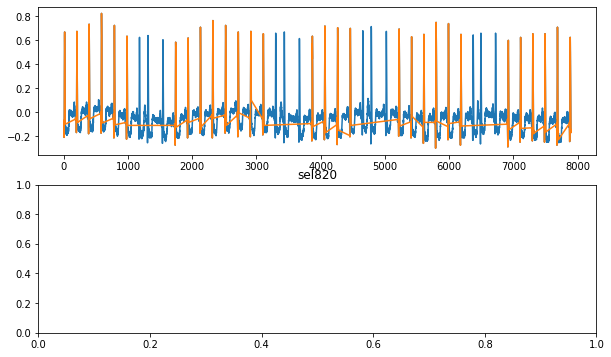

sel821
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel821.q2c


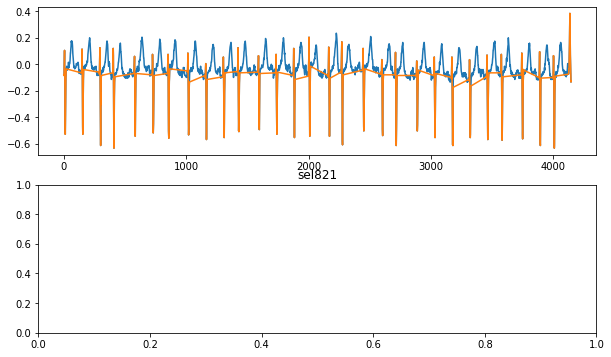

sel840
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel840.q2c


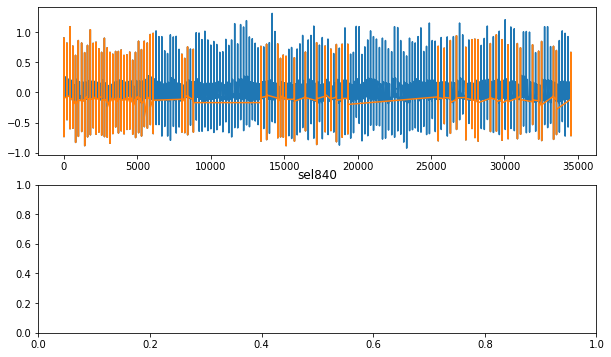

sel847
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel847.q2c


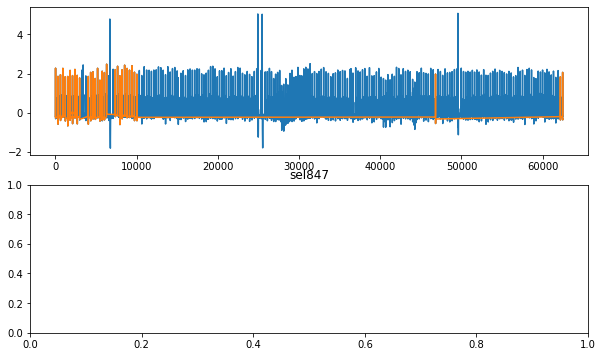

sel853
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel853.q2c


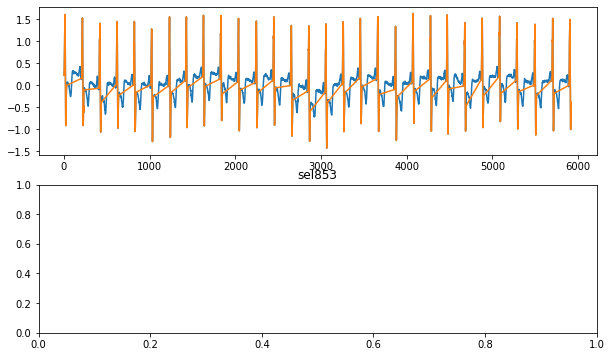

sel871
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel871.q2c


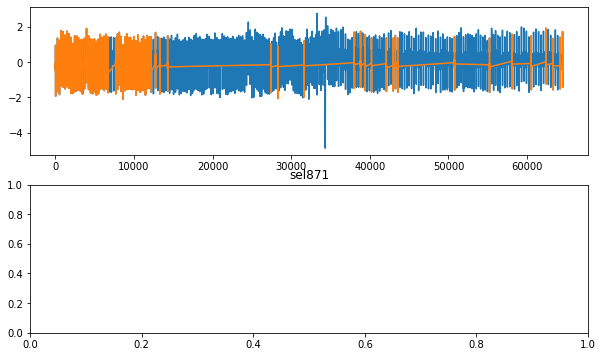

sel872
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel872.q2c


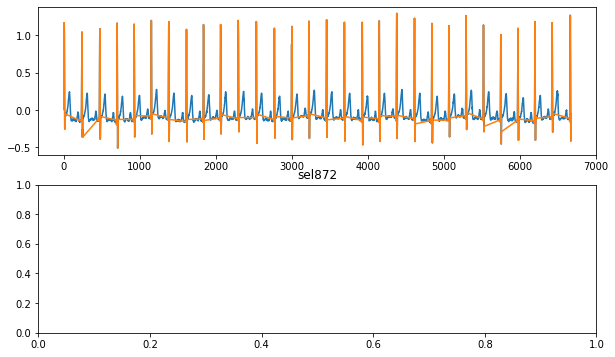

sel873
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel873.q2c


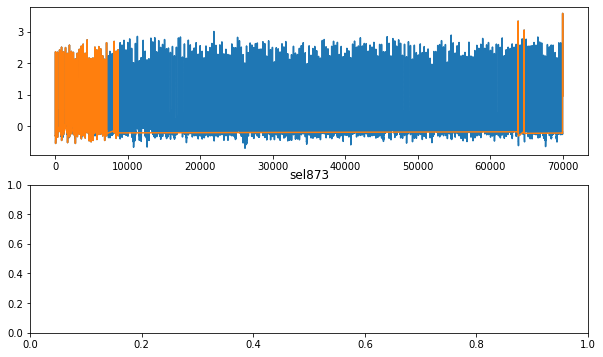

sel883
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel883.q2c


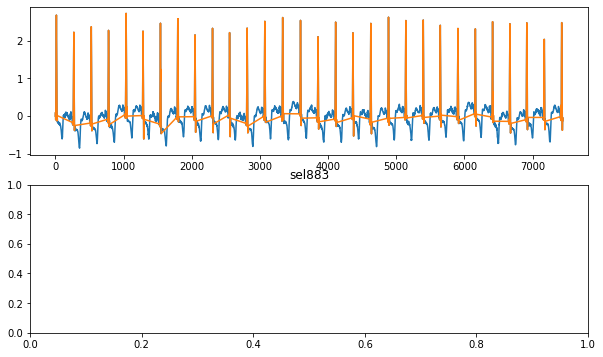

sel891
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sel891.q2c


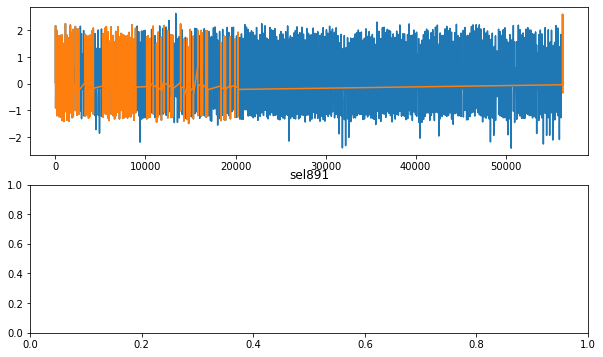

sele0104
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0104.q2c


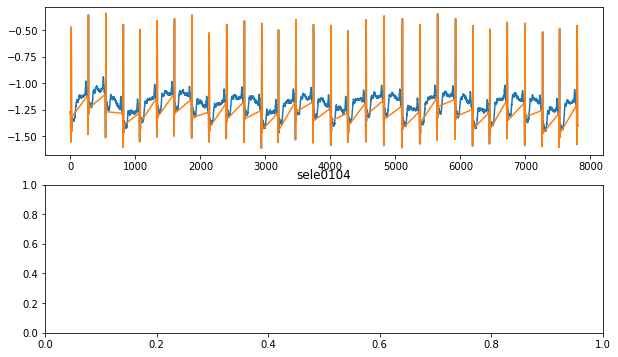

sele0106
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0106.q2c


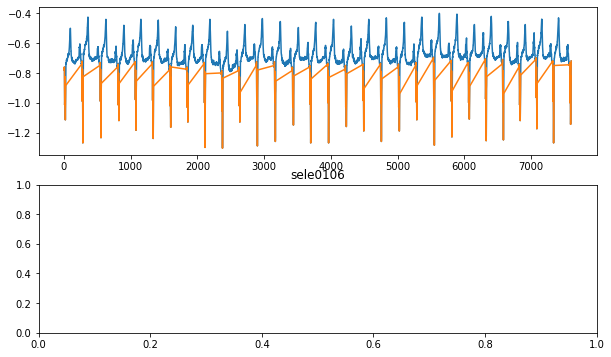

sele0107
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0107.q2c


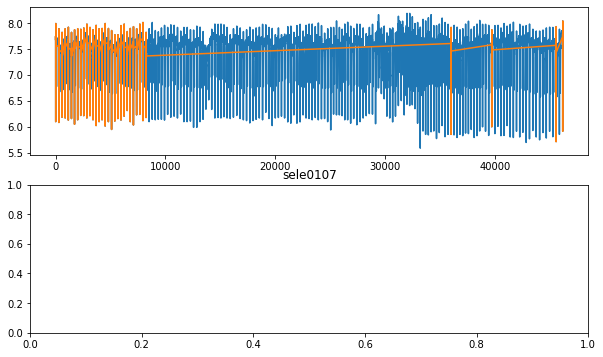

sele0110
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0110.q2c


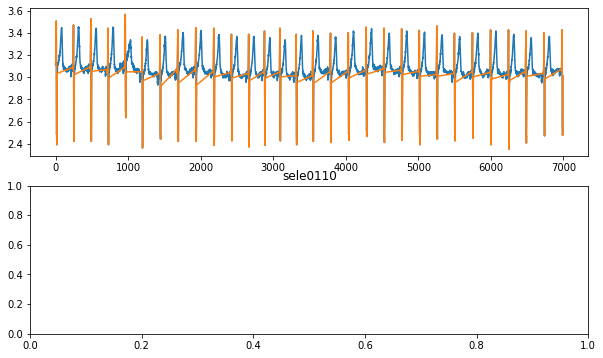

sele0111
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0111.q2c


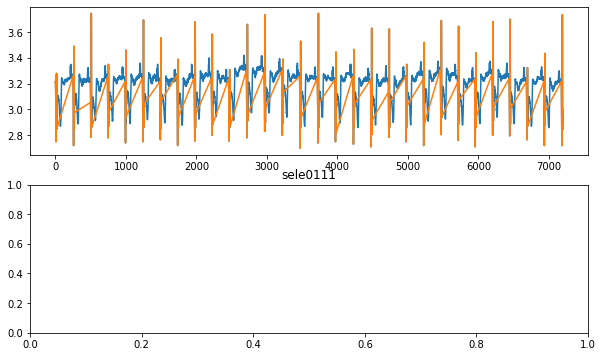

sele0112
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0112.q2c


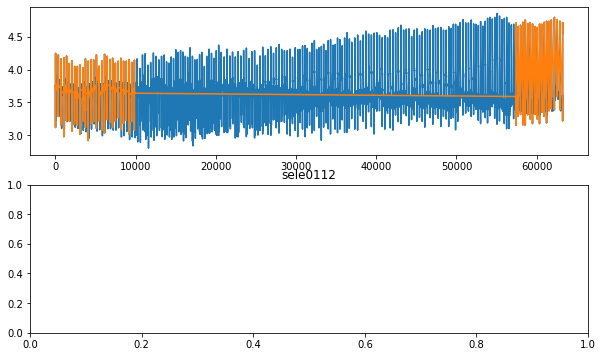

sele0114
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0114.q2c


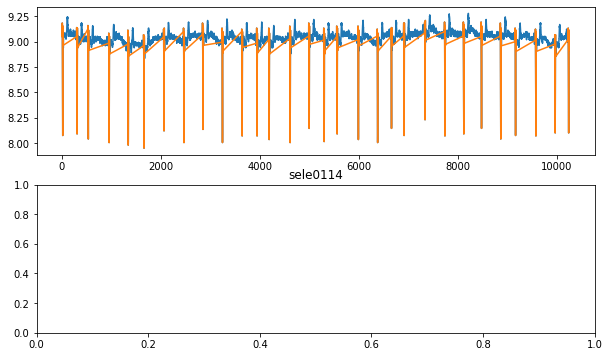

sele0116
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0116.q2c


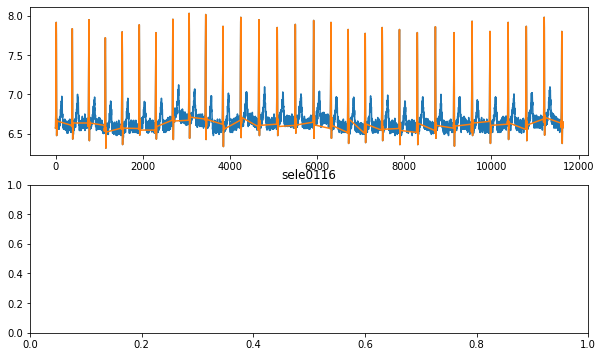

sele0121
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0121.q2c


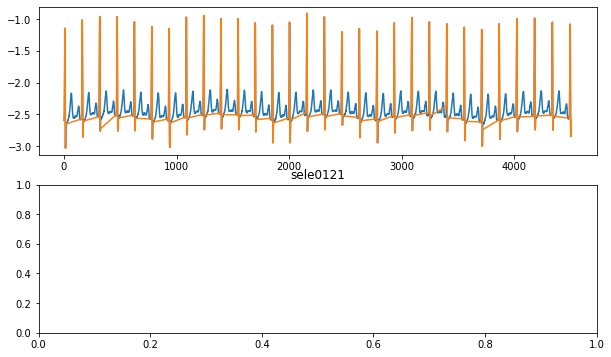

sele0122
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0122.q2c


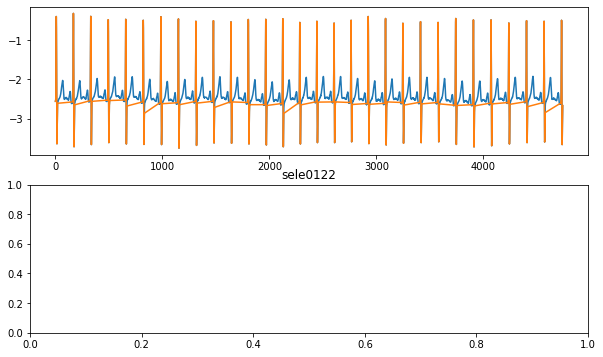

sele0124
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0124.q2c


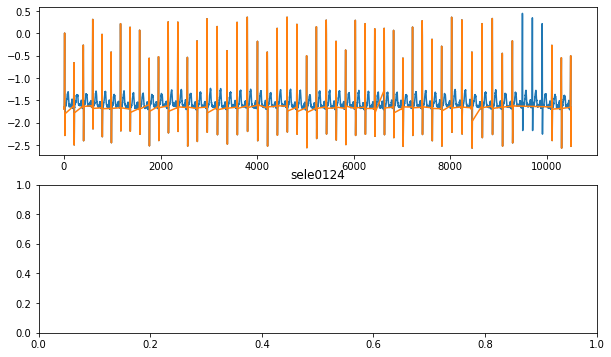

sele0126
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0126.q2c


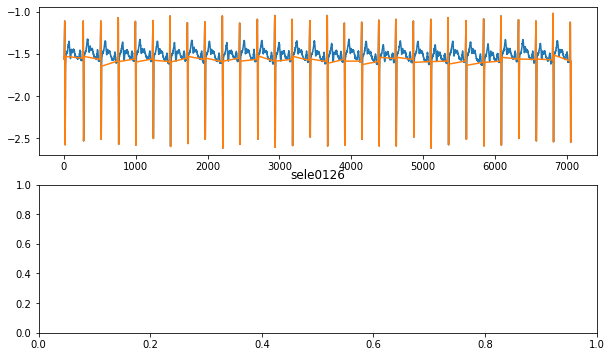

sele0129
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0129.q2c


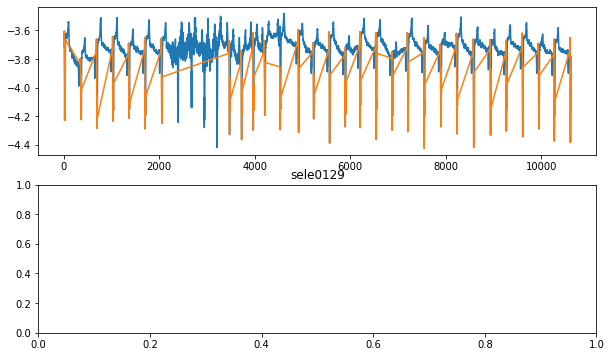

sele0133
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0133.q2c


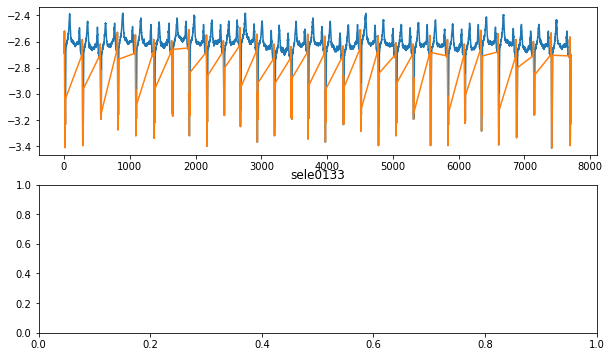

sele0136
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0136.q2c


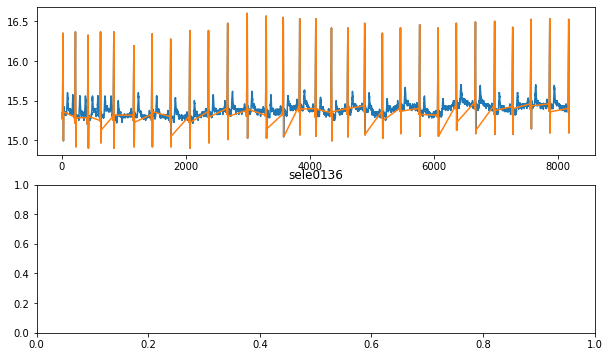

sele0166
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0166.q2c


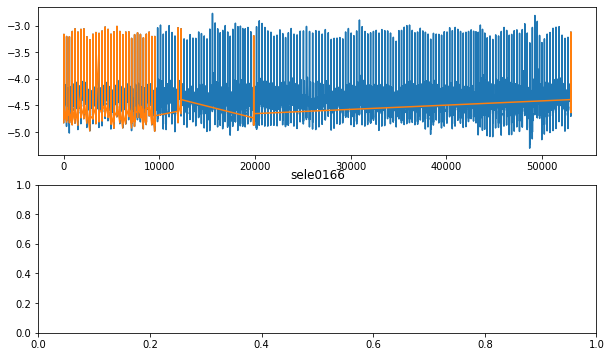

sele0170
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0170.q2c


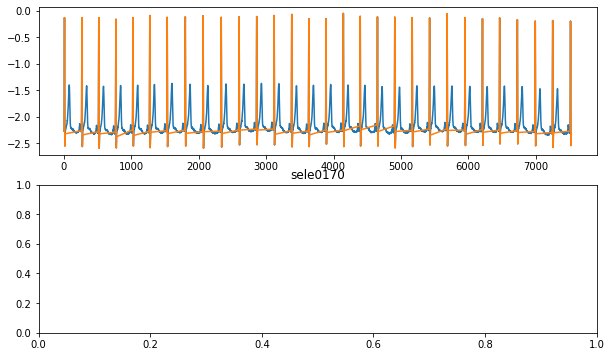

sele0203
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0203.q2c


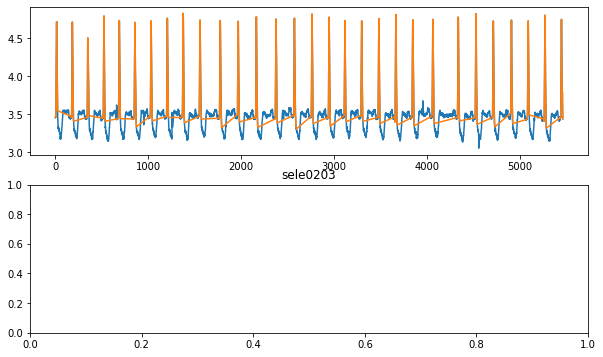

sele0210
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0210.q2c


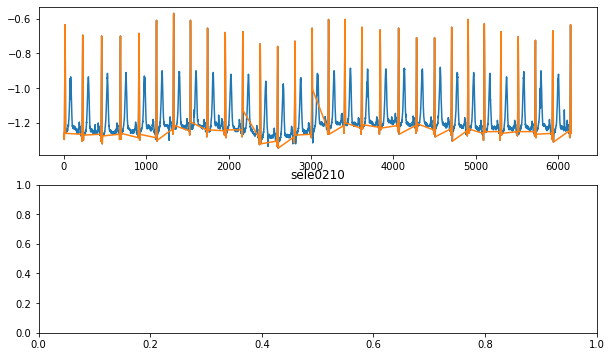

sele0211
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0211.q2c


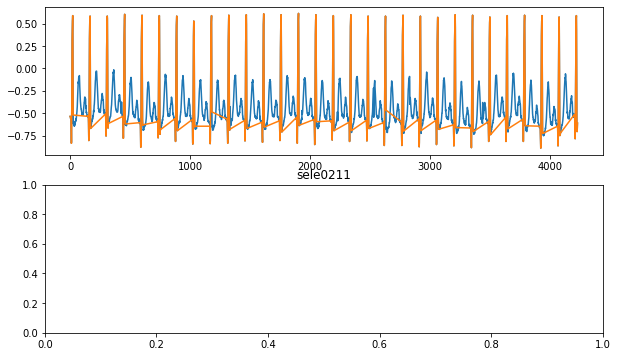

sele0303
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0303.q2c


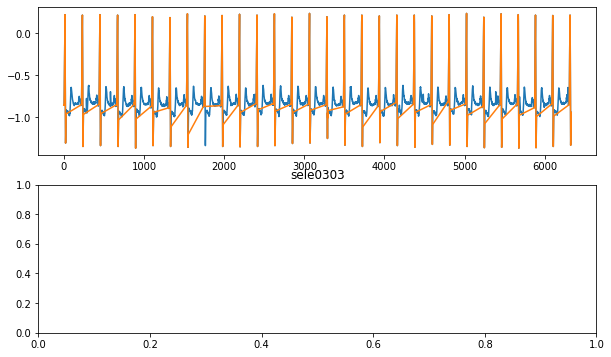

sele0405
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0405.q2c


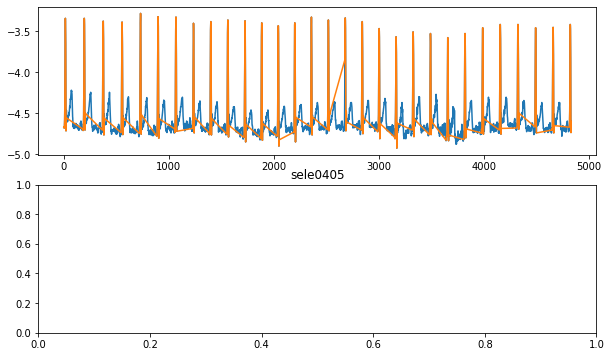

sele0406
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0406.q2c


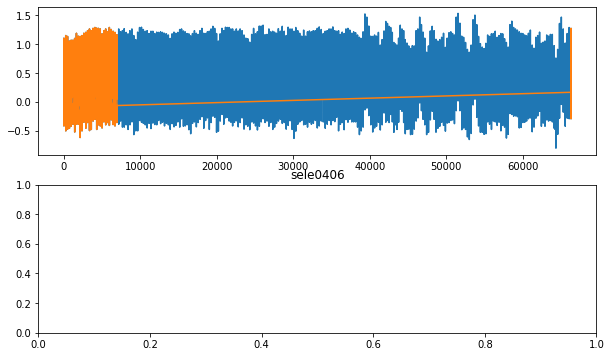

sele0409
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0409.q2c


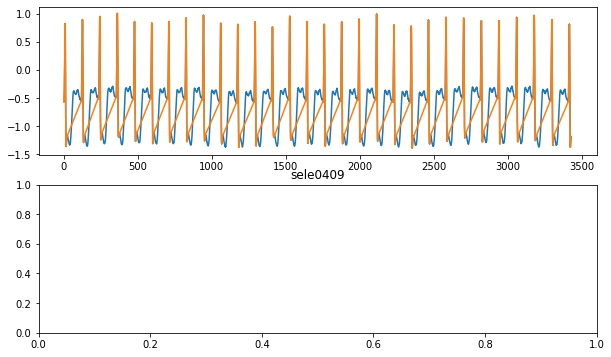

sele0411
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0411.q2c


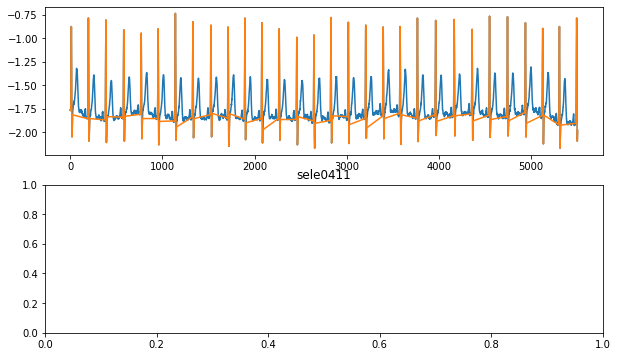

sele0509
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0509.q2c


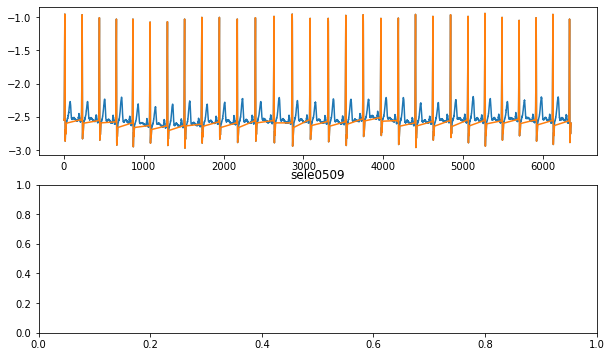

sele0603
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0603.q2c


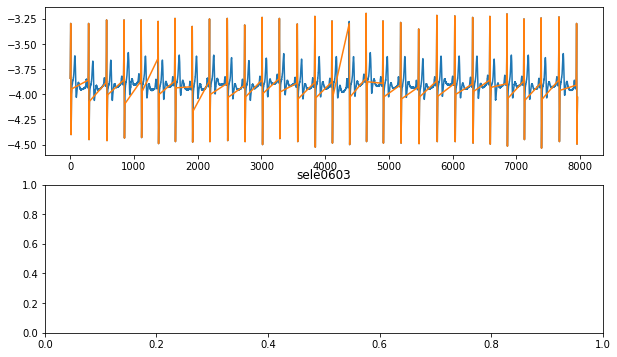

sele0604
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0604.q2c


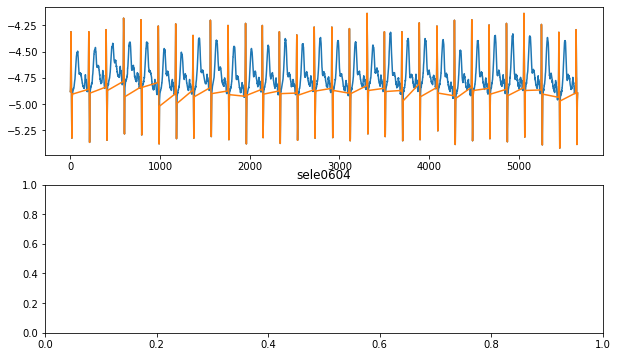

sele0606
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0606.q2c


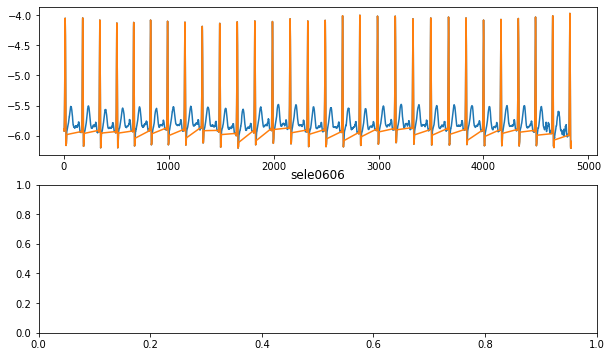

sele0607
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0607.q2c


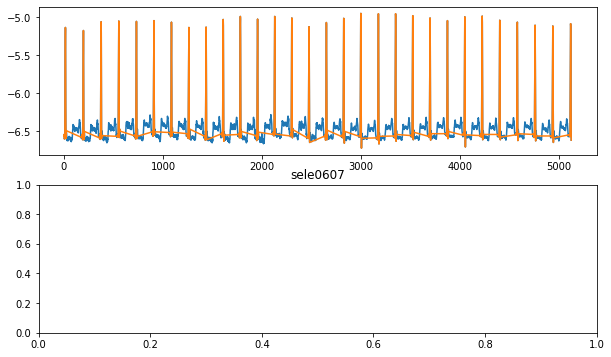

sele0609
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0609.q2c


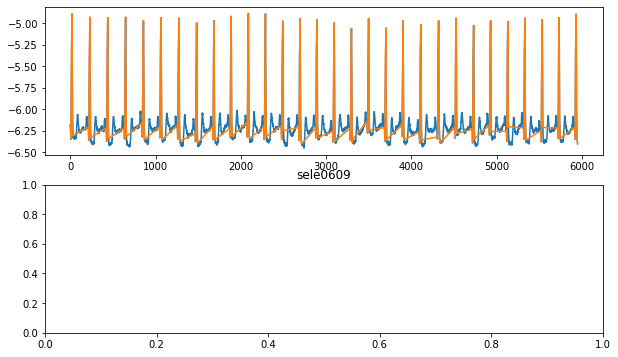

sele0612
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0612.q2c


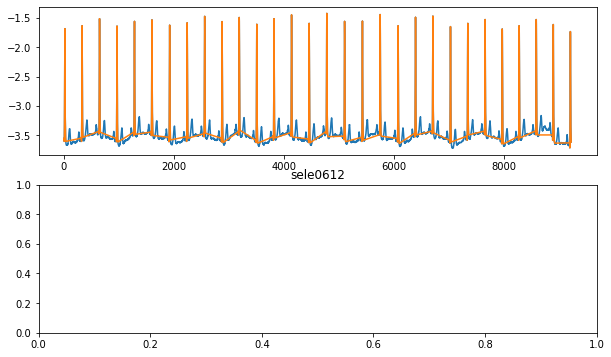

sele0704
ch2: 404 Client Error: Not Found for url: http://physionet.org/physiobank/database/qtdb/sele0704.q2c


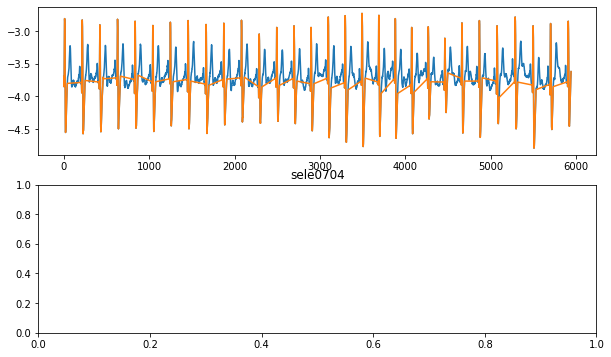

In [3]:
#get a list of records and remove newlines
with open('RECORDS.txt') as f: records = f.readlines()
record_names = [r.strip() for r in records]

#all data is 250Hz sampling rate
fs = 250

labeled_data = []
#read each record from the database
for record_name in record_names:
    print(record_name)

    record = wfdb.rdrecord(record_name, pb_dir=pb_dir)
    ch1 = record.__dict__['p_signal'][:,0]
    ch2 = record.__dict__['p_signal'][:,1]

    #get the QRS labels for ch1
    try:
        annotations = wfdb.rdann(record_name, 'q1c', pb_dir=pb_dir)
        inds = annotations.__dict__['sample']
        symbols = annotations.__dict__['symbol']
        QRS_inds_ch1, ch1 = get_QRS_labels(inds, symbols, ch1, record_name, 'ch1')
    except Exception as e:
        print('ch1: ' + str(e))
        QRS_inds_ch1 = None
        ch1 = None

    #get the QRS labels for ch2
    try:
        annotations = wfdb.rdann(record_name, 'q2c', pb_dir=pb_dir)
        inds = annotations.__dict__['sample']
        symbols = annotations.__dict__['symbol']
        QRS_inds_ch2, ch2 = get_QRS_labels(inds, symbols, ch2, record_name, 'ch2')
    except Exception as e:
        print('ch2: ' + str(e))
        QRS_inds_ch2 = None
        ch2 = None

    #by default, keep all the labeled data
    inds_to_keep_ch1 = QRS_inds_ch1
    inds_to_keep_ch2 = QRS_inds_ch2

    #adjust the label indices for the following records due to large gaps in QRS labels
    if record_name.lower() == 'sel102':
        inds_to_keep_ch1 = np.concatenate((range(0,1183), range(1855, 3775), range(4560, 6045), range(7850, 9345), range(12385, 15355)))

    if record_name.lower() == 'sel104':
        inds_to_keep_ch1 = np.array(range(0,7365))

    if record_name.lower() == 'sel114':
        inds_to_keep_ch1 = np.concatenate((range(0, 6820), range(60240, 61290), range(62840, QRS_inds_ch1[-1])))
        inds_to_keep_ch2 = np.concatenate((range(0, 6805), range(60205, 61275), range(62280, QRS_inds_ch2[-1])))

    if record_name.lower() == 'sel116':
        inds_to_keep_ch1 = np.array(range(4360, 10510))
        inds_to_keep_ch2 = np.array(range(4360, 10890))

    if record_name.lower() == 'sel14046':
        inds_to_keep_ch1 = np.array(range(0, 5425))

    if record_name.lower() == 'sel14172':
        inds_to_keep_ch1 = np.array(range(0, 10420))

    if record_name.lower() == 'sel213':
        inds_to_keep_ch1 = np.array(range(0, 3740))
        inds_to_keep_ch2 = np.array(range(0, 3740))

    if record_name.lower() == 'sel221':
        inds_to_keep_ch1 = np.array(range(6120, QRS_inds_ch1[-1]))
        inds_to_keep_ch2 = np.array(range(6120, QRS_inds_ch1[-1]))

    if record_name.lower() == 'sel223':
        inds_to_keep_ch1 = np.array(range(0, 4955))
        inds_to_keep_ch2 = np.array(range(0, 4955))

    if record_name.lower() == 'sel230':
        inds_to_keep_ch1 = np.array(range(0, 6740))
        inds_to_keep_ch2 = np.array(range(0, 6740))

    if record_name.lower() == 'sel231':
        inds_to_keep_ch1 = np.concatenate((range(0, 11125), range(15605, QRS_inds_ch1[-1])))

    if record_name.lower() == 'sel301':
        inds_to_keep_ch1 = np.concatenate((range(0, 3035), range(6830, QRS_inds_ch1[-1])))

    if record_name.lower() == 'sel306':
        inds_to_keep_ch1 = np.array(range(0, 6230))

    if record_name.lower() == 'sel308':
        inds_to_keep_ch1 = np.concatenate((range(1515, 3640), range(6515, 9700)))

    if record_name.lower() == 'sel35':
        inds_to_keep_ch1 = np.array(range(0, 7625))

    if record_name.lower() == 'sel37':
        inds_to_keep_ch1 = np.array(range(30240, QRS_inds_ch1[-1]))

    if record_name.lower() == 'sel46':
        inds_to_keep_ch1 = np.concatenate((range(0, 4185), range(13080, QRS_inds_ch1[-1])))

    if record_name.lower() == 'sel50':
        inds_to_keep_ch1 = np.array(range(0, 10440))

    if record_name.lower() == 'sel840':
        inds_to_keep_ch1 = np.array(range(0, 6090))

    if record_name.lower() == 'sel847':
        inds_to_keep_ch1 = np.array(range(0, 10040))

    if record_name.lower() == 'sel871':
        inds_to_keep_ch1 = np.array(range(0, 12200))

    if record_name.lower() == 'sel873':
        inds_to_keep_ch1 = np.array(range(0, 8660))

    if record_name.lower() == 'sel891':
        inds_to_keep_ch1 = np.array(range(0,8920))

    if record_name.lower() == 'sele0107':
        inds_to_keep_ch1 = np.array(range(0, 8250))

    if record_name.lower() == 'sele0112':
        inds_to_keep_ch1 = np.concatenate((range(0, 9850), range(57410, QRS_inds_ch1[-1])))

    if record_name.lower() == 'sele0166':
        inds_to_keep_ch1 = np.array(range(0, 9525))

    if record_name.lower() == 'sele0406':
        inds_to_keep_ch1 = np.array(range(0, 6945))

    #skip the following records because there are too many unlabeled QRS complexes
    if record_name.lower() in ['sel233', 'sel36', 'sel42', 'sel44']:
        QRS_inds_ch1 = None
        ch1 = None

    if record_name.lower() == 'sel102':
        QRS_inds_ch2 = None
        ch2 = None

    tmp_dict = {'record_name': record_name, 'ch1': ch1, 'qrs_ch1': QRS_inds_ch1, 'inds_to_keep_ch1': inds_to_keep_ch1,
                'ch2': ch2, 'qrs_ch2': QRS_inds_ch2, 'inds_to_keep_ch2': inds_to_keep_ch2}
    labeled_data.append(tmp_dict)
    
    plt.figure(figsize=(10,6))
    plt.subplot(2,1,1)
    if ch1 is not None:
        plt.plot(ch1)
        plt.plot(QRS_inds_ch1, ch1[QRS_inds_ch1])
    plt.subplot(2,1,2)
    if ch2 is not None:
        plt.plot(ch2)
        plt.plot(QRS_inds_ch2, ch2[QRS_inds_ch2])
    plt.title('%s' % (record_name))
    plt.show()



#save as a dataframe
labeled_data = pd.DataFrame(labeled_data)
labeled_data.to_pickle('data_labels.pkl', protocol=4)








